<a href="https://colab.research.google.com/github/Requenamar3/DeepLearning/blob/main/Copy_of_Tune_the_LR_in_a_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4787,white,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,8
3098,white,5.1,0.330,0.27,6.7,0.022,44.0,129.0,0.99221,3.36,0.39,11.00,7
4733,white,5.2,0.185,0.22,1.0,0.030,47.0,123.0,0.99218,3.55,0.44,10.15,6
1182,white,7.4,0.220,0.33,2.0,0.045,31.0,101.0,0.99310,3.42,0.55,11.40,5
2926,white,5.2,0.155,0.33,1.6,0.028,13.0,59.0,0.98975,3.30,0.84,11.90,8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare the data
df = df.dropna()
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']
]
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.5254 - accuracy: 0.7420 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4955 - accuracy: 0.7638 - lr: 0.0011
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7733 - lr: 0.0012
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7810 - lr: 0.0013
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.7822 - lr: 0.0014
Epoch 6/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.7868 - lr: 0.0015
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.7899 - lr: 0.0016
Epoch 8/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4376 - accuracy: 0.7880 - lr: 0.0017
Epoch 9/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4302 - accu

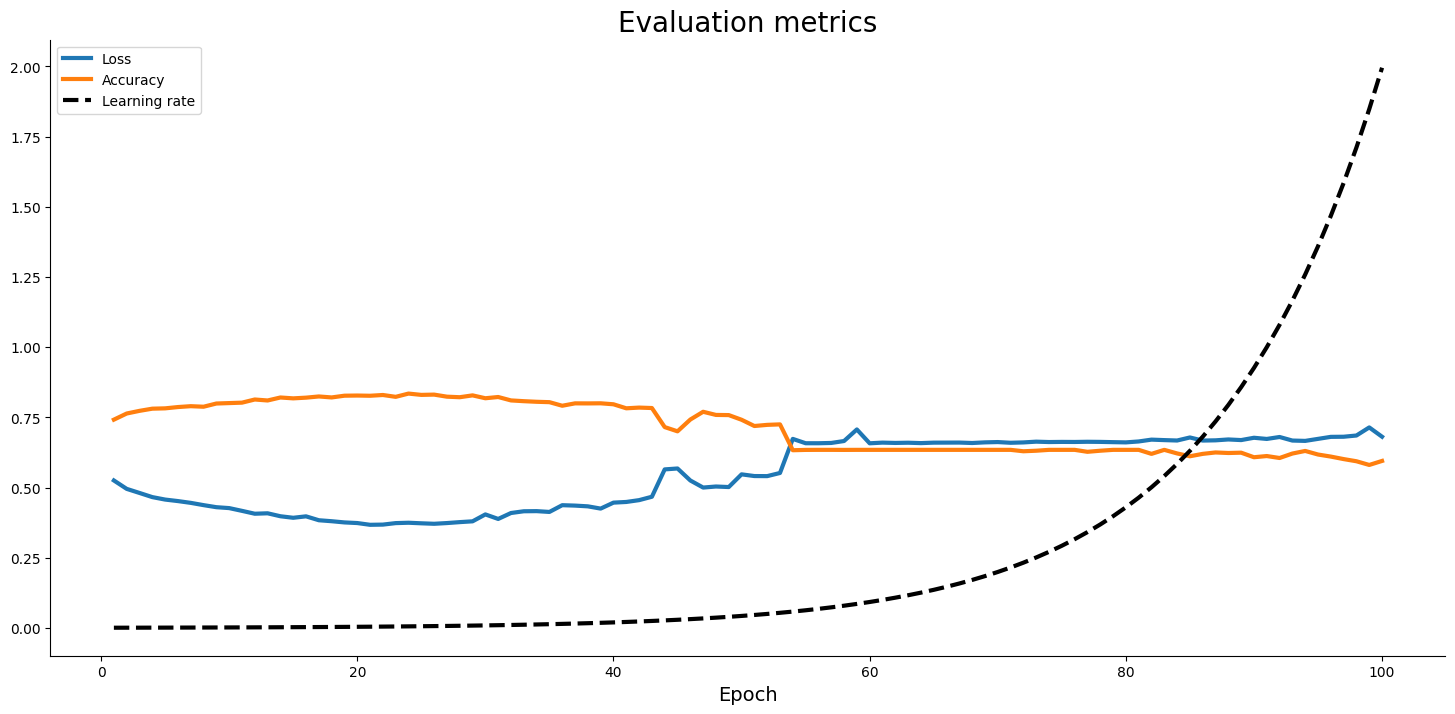

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101),
    initial_history.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['accuracy'],
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['lr'],
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

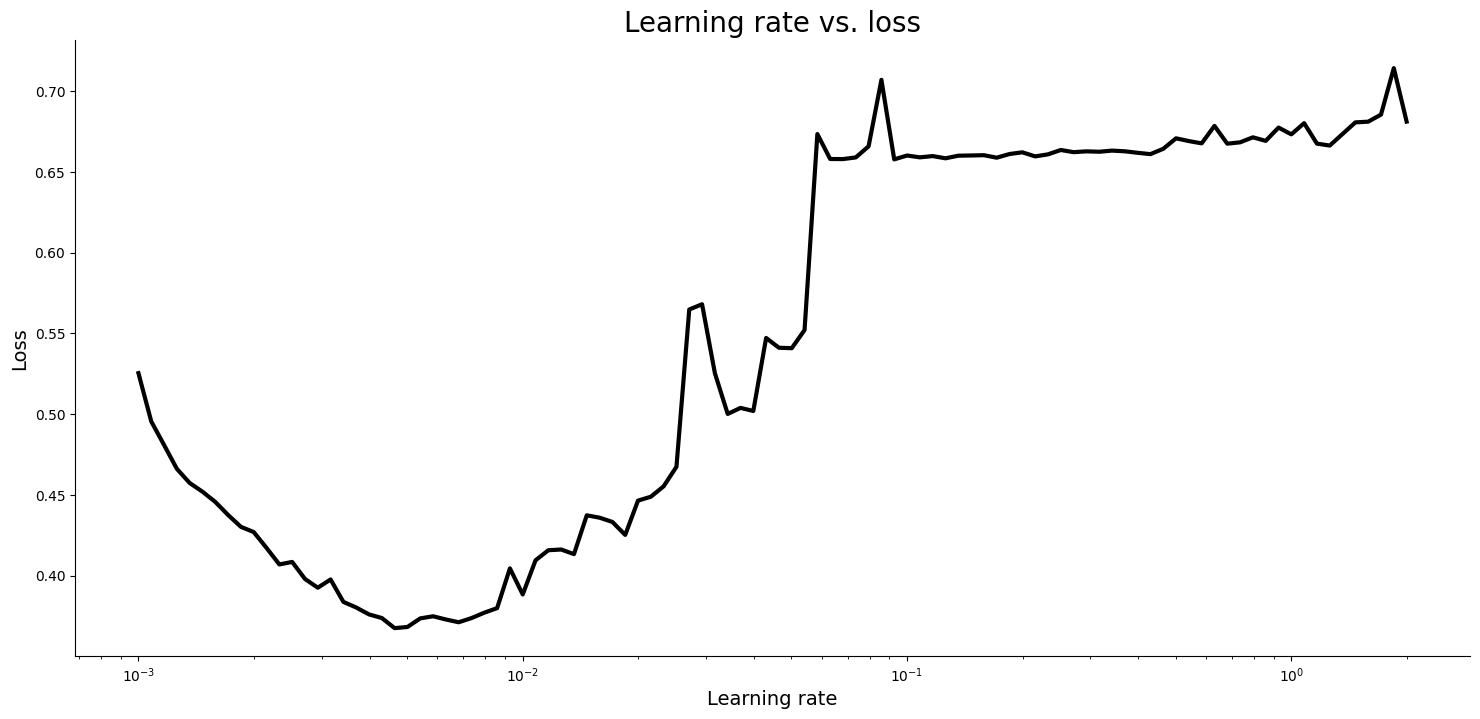

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates,
    initial_history.history['loss'],
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [ ]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100
)

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.5324 - accuracy: 0.7360
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: 0.5100 - accuracy: 0.7565
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.7607
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4859 - accuracy: 0.7662
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4803 - accuracy: 0.7648
Epoch 6/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4724 - accuracy: 0.7791
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4697 - accuracy: 0.7783
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4614 - accuracy: 0.7826
Epoch 9/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7874
Epoch 10/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4401 - accura

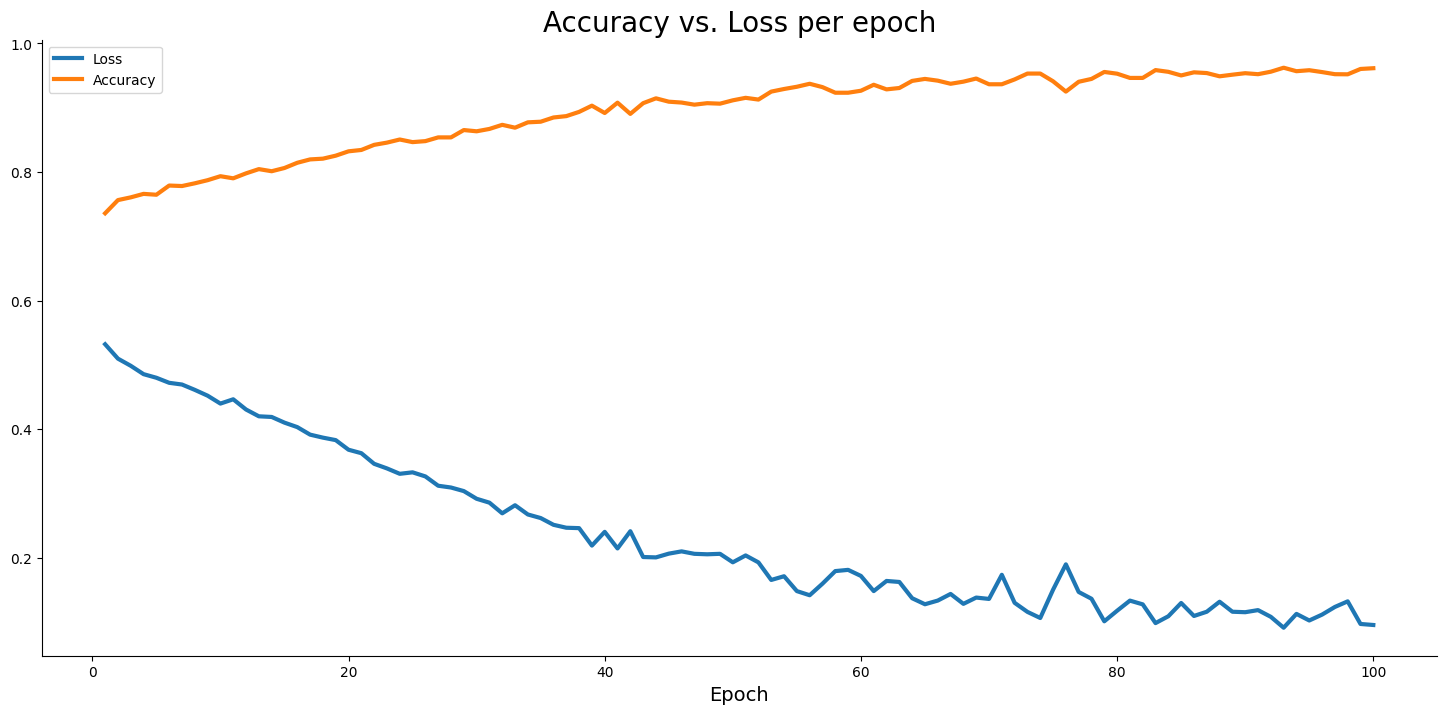

In [ ]:
plt.plot(
    np.arange(1, 101),
    history_optimized.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    history_optimized.history['accuracy'],
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()